## Install libraries for statmodels and scipy

In [3]:
! pip install statsmodels scipy

## Import the libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scistat

In [27]:
df = pd.read_csv("raw_data/covidtotals.csv")


In [29]:
df.head(2)

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89


In [31]:
df.set_index('iso_code', inplace = True)

In [33]:
total_cols = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

dmg_cols = ['population', 'pop_density', 'median_age', 'gdp_per_capita', 'hosp_beds']

## Get the descriptive statistics for Covid Case Data

In [36]:
df_totals = df.loc[:,total_cols]

df_totals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,210.000000,210.000000
mean,2.921614e+04,1770.714286,1355.357943,55.659129
std,1.363978e+05,8705.565857,2625.277497,144.785816
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.757500e+02,4.000000,92.541500,0.884750
50%,1.242500e+03,25.500000,280.928500,6.154000
75%,1.011700e+04,241.250000,1801.394750,31.777250
max,1.790191e+06,104383.000000,19771.348000,1237.551000


## Get more detailed percentile data

In [45]:
df_totals.select_dtypes(exclude=['object']).quantile(np.arange(0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.0000,0.0000
0.1,22.9,0.0,17.9986,0.0000
0.2,105.2,2.0,56.2910,0.3752
0.3,302.0,6.7,115.4341,1.7183
0.4,762.0,12.0,213.9734,3.9566
0.5,1242.5,25.5,280.9285,6.1540
0.6,2514.6,54.6,543.9562,12.2452
0.7,6959.8,137.2,1071.2442,25.9459
0.8,16847.2,323.2,2206.2982,49.9658
0.9,46513.1,1616.9,3765.1363,138.9045


## Show Skewness and Kurtosis

### What is Skewness

### What is Kurtosis

Kurtosis- Kurtosis is a statistical measure that describes the tailedness of a probability distribution, 
          specifically how the distribution's tails and peak differ from a normal distribution.

          
It does not measure the peakedness as commonly misunderstood, but rather the degree of tailedness.
          
          
Kurtosis can be categorized into three types: medium-tailed, thin-tailed, and fat-tailed


A high kurtosis value, or leptokurtic distribution, signifies that the distribution has heavier tails and more outliers than a normal distribution.

Conversely, a low kurtosis value, or platykurtic distribution, indicates lighter tails and fewer outliers.

A mesokurtic distribution has kurtosis similar to a normal distribution

In [52]:
df_totals.select_dtypes(include = ['number']).skew()

total_cases        10.804275
total_deaths        8.929816
total_cases_pm      4.396091
total_deaths_pm     4.674417
dtype: float64

In [56]:
df_totals.select_dtypes(include = ['number']).kurtosis()

total_cases        134.979577
total_deaths        95.737841
total_cases_pm      25.242790
total_deaths_pm     27.238232
dtype: float64

## Test the data for Normality

### Shapiro-Wilk Test

In [62]:
def testnorm(var,df):
    stat,p = scistat.shapiro(df[var])
    return p



In [64]:
testnorm("total_cases", df_totals)

3.753761827331286e-29

In [66]:
testnorm("total_deaths", df_totals)

4.342718923026598e-29

In [68]:
testnorm("total_cases_pm", df_totals)

1.3972537080472942e-23

In [70]:
testnorm("total_deaths_pm", df_totals)

1.3610513510647537e-25

## Show normal quantile-quantile plots(Q-Q plot) of total cases and total cases per million



Text(0.5, 1.0, 'QQ plot of Total Cases')

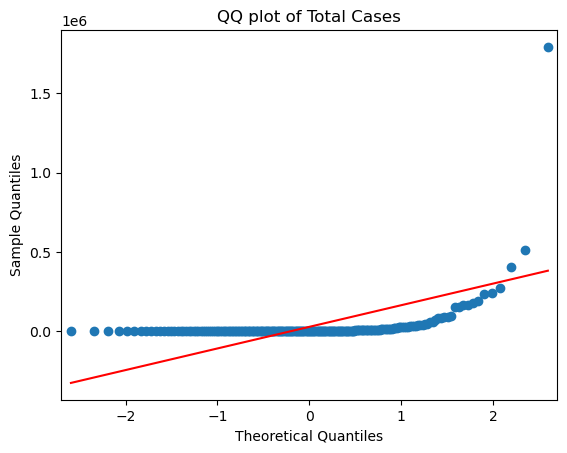

In [77]:
sm.qqplot(df_totals[['total_cases']].sort_values(['total_cases']), line = 's')
plt.title("QQ plot of Total Cases")

Text(0.5, 1.0, 'QQ plot of Total Cases per million')

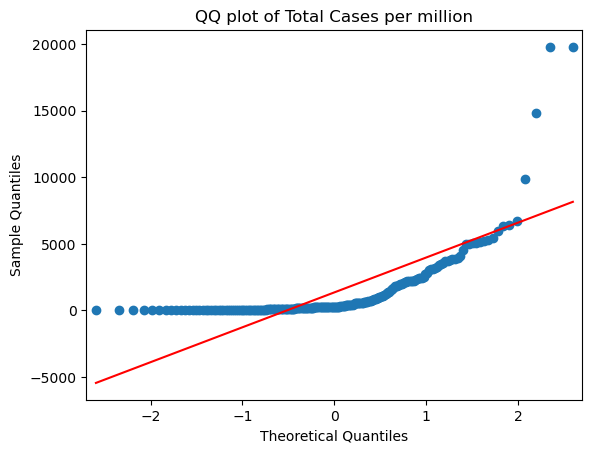

In [79]:
sm.qqplot(df_totals[['total_cases_pm']].sort_values(['total_cases_pm']), line = 's')
plt.title("QQ plot of Total Cases per million")